In [21]:
import pandas as pd
import math

Calculating the floor hours for checked-times.csv

In [22]:
data = pd.read_csv('checked-times.csv')
data['time']=data['time'].transform(lambda x: x[:2])
data.to_csv('checked-times1.csv',index=False)

Creating a single csv file which includes the checkin and checkout times for each visit in a single row

In [23]:
column_names = ["Name", "Rollno", "checkin-time", "checkout-time"]
df = pd.DataFrame(columns=column_names)
df.to_csv("histogram-data.csv",index=False)

In [24]:
source = pd.read_csv("checked-times1.csv")
destination = pd.read_csv("histogram-data.csv")

for index, row in source.iterrows():
    sample = []
    if row["Checked"] == "In":
        sample.append(row["Name"])
        sample.append(row["Roll_no"])
        sample.append(row["time"])
        for i,r in source.iterrows():
            if r["Checked"] == "Out" and sample[1] == r["Roll_no"]:
                sample.append(r["time"])
    if len(sample) == 4:
        destination.loc[len(destination.index)] = sample
print(destination)
destination.to_csv("histogram-data.csv", index=False)

       Name  Rollno  checkin-time  checkout-time
0   Vaibhav  231074            10             11
1      John  231075            12             15
2      Mary  231076            14             16
3     David  231077             9             17
4     Alice  231078            11             18
5       Bob  231079             8             10
6      Sara  231080            13             14
7     Peter  231081             9             11
8     Linda  231082            12             13
9      Mark  231083            14             16
10     Jane  231084             8             10
11      Tom  231085            11             13
12    Jenny  231086            15             16
13     Mike  231087            10             12
14     Lucy  231088            14             16
15   Oliver  231089             8             10
16    Karen  231090            11             13
17     Jake  231091            13             15
18    Emily  231092             8             10
19      Tim  231093 

Creating another csv file which stores the frequncy of each hour.

In [25]:
column_names = []
for i in range(9,20):
    column_names.append(str(i-1))
df = pd.DataFrame(columns=column_names)
df.to_csv("time-frequency.csv", index = False)

In [26]:
hd = pd.read_csv("histogram-data.csv")
tf = pd.read_csv("time-frequency.csv")
for index, rows in hd.iterrows():
    sample = []
    for i in range (0,len(tf.columns)):
        sample.append(0)
    start = int(rows["checkin-time"])
    end = int(rows["checkout-time"])
    start = start -8
    end = end - 8
    for i in range(end+1-start):
        sample[start+i] = 1
    # print(sample)
    tf.loc[len(tf.index)] = sample
print(tf)
tf.to_csv('time-frequency.csv',index=False)


    8  9  10  11  12  13  14  15  16  17  18
0   0  0   1   1   0   0   0   0   0   0   0
1   0  0   0   0   1   1   1   1   0   0   0
2   0  0   0   0   0   0   1   1   1   0   0
3   0  1   1   1   1   1   1   1   1   1   0
4   0  0   0   1   1   1   1   1   1   1   1
5   1  1   1   0   0   0   0   0   0   0   0
6   0  0   0   0   0   1   1   0   0   0   0
7   0  1   1   1   0   0   0   0   0   0   0
8   0  0   0   0   1   1   0   0   0   0   0
9   0  0   0   0   0   0   1   1   1   0   0
10  1  1   1   0   0   0   0   0   0   0   0
11  0  0   0   1   1   1   0   0   0   0   0
12  0  0   0   0   0   0   0   1   1   0   0
13  0  0   1   1   1   0   0   0   0   0   0
14  0  0   0   0   0   0   1   1   1   0   0
15  1  1   1   0   0   0   0   0   0   0   0
16  0  0   0   1   1   1   0   0   0   0   0
17  0  0   0   0   0   1   1   1   0   0   0
18  1  1   1   0   0   0   0   0   0   0   0
19  0  0   0   1   1   1   0   0   0   0   0
20  0  0   0   0   0   0   1   1   1   0   0
21  0  0  

Finding the total time frequency for each hour and adding it to the end of the csv file

In [27]:
tf = pd.read_csv("time-frequency.csv")

sample = []
for col in tf:
    sample.append(sum(tf[col]))
print(sample)
tf.loc[len(tf.index)] = sample
tf.to_csv('time-frequency.csv',index= False)

[5, 7, 9, 9, 9, 11, 10, 11, 8, 3, 1]


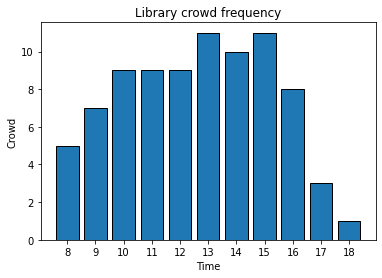

<Figure size 2880x432 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

x = list(tf.columns)
y = tf.loc[len(tf.index)-1]
# print(x)
# print(y)
plt.xlabel("Time")
plt.ylabel("Crowd")
plt.bar(x,y, edgecolor = "black")
plt.title("Library crowd frequency")
plt.figure(figsize=(40,6))

plt.show()

